## Chapter 2

#### Important Nodes

##### Degree centrality

-  Which nodes are important?

    - Degree Centrality
    - Betweenness Centrality
    
-  From the concept of neighbours, if there is node that is connected to several nodes from the center, and if the center-node does not have more neighbour nodes, then we consider it as "degree of Centrality"
-  Degree of Centrality =  (Number of Neighbours it has)/(Number of Neighbours it could possibly have)
    -  Two Scenarios possible:
        -  If self Loops are allowed, then number of graphs will be include the node-graph itself
        -  If self loops are not allowed, then number of graphs will be excluding the node-graph itself


In [65]:
# Number of Neighbours in a node-graph.
import networkx as nx

# Define the node-graph
G = nx.Graph()

# add nodes.
G.add_nodes_from([(1,2),(1,3)])

# print nodes
print(G.nodes())
# add edges
G.add_edge(1,3)

# print it's edges
print(G.edges())

# Get neighbours
print(G.neighbors(3))

# Networkx functionality provides Degree Centrality function.
nx.degree_centrality(G)

[(1, 2), (1, 3)]
[(1, 3)]


{(1, 2): 0.0, (1, 3): 0.0, 1: 0.3333333333333333, 3: 0.3333333333333333}

Compute number of neighbors for each node
How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: the number of neighbors that a node has.

Every NetworkX graph G exposes a .neighbors(n) method that returns a list of nodes that are the neighbors of the node n. To begin, use this method in the IPython Shell on the Twitter network T to get the neighbors of of node 1. This will get you familiar with how the function works. Then, your job in this exercise is to write a function that returns all nodes that have m neighbors.

In [ ]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)

Compute degree distribution
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. In this exercise, your job is to compute the degree distribution across T

The basic syntax for a list comprehension is [output expression for iterator variable in iterable].

In [ ]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(degrees)

Degree centrality distribution
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The nx.degree_centrality(G) function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

The degree distribution degrees you computed in the previous exercise using the list comprehension has been pre-loaded.

In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

#### Graph Algorithms
##### Finding path
    - optimization : finding the shortest path
    - modeling : Information passing e.g. disease out-break
##### "Breath-first" (BFS) search algorithm to find the "Shortest path"
    - 1950
    - Working : 11 nodes, suppose the result nodes is some X+y position
    - Algorithms start searching each nodes ask whether found or not, until it finds the X+y position


Nodes of graph: 
['Toronto', 'London', 'Berlin', 'New York', 'New Delhi', 'Amsterdam']
Edges of graph: 
[('Toronto', 'London'), ('London', 'Berlin'), ('Berlin', 'New York'), ('New York', 'New Delhi'), ('New Delhi', 'Amsterdam')]
Number of edges: 5
Number of nodes b/w edges: 6
Number of Neighbors of New Delhi is: 2
Neighbors of New Delhi: ['New York', 'Amsterdam']
Number of Neighbors of NewYork is: 2
Neighbors of NewYork: ['Berlin', 'New Delhi']


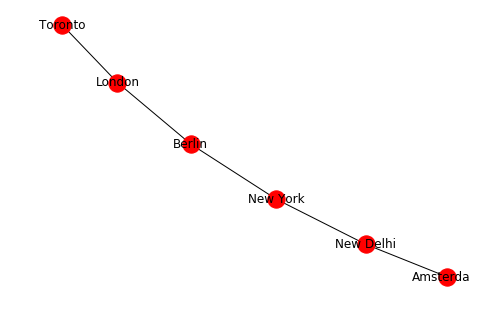

In [66]:
# Graph G

import networkx as nx
import matplotlib.pyplot as plt

G=nx.path_graph(["Canada","UK","Germany","USA","India","Netherlands"])
cities = {"Canada":"Toronto",
          "UK":"London", 
          "Germany":"Berlin",
          "USA":"New York", 
          "India":"New Delhi",
          "Netherlands":"Amsterdam"}
H=nx.relabel_nodes(G,cities)
print("Nodes of graph: ")
print(H.nodes())
print("Edges of graph: ")
print(H.edges())

# Length of edges:
print("Number of edges:", len(H.edges()))

# Numbers of nodes between edges
print("Number of nodes b/w edges:", len(H.nodes()))

# find the neighbours
print("Number of Neighbors of New Delhi is:", len(list(H.neighbors('New Delhi'))))



# print neigbors of 'New Delhi'
print("Neighbors of New Delhi:", list(H.neighbors('New Delhi')))

# find the neighbours of New York
print("Number of Neighbors of NewYork is:", len(list(H.neighbors('New York'))))

# print neigbors of 'New York'
print("Neighbors of NewYork:", list(H.neighbors('New York')))


nx.draw(H, with_labels=True)
plt.savefig("path_graph_cities.png")
plt.show()



Shortest Path I
You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance; you'll see this in a later exercise.

In this set of 3 exercises, you're going to build up slowly to get to the final BFS algorithm. The problem has been broken into 3 parts that, if you complete in succession, will get you to a first pass implementation of the BFS algorithm.

In [43]:
# Define path_exists(G, node1, node2)
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()

    # Initialize the queue of nodes to visit with the first node: queue
    queue = [node1]

    # Iterate over the nodes in the queue
    for node in queue:

        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

Shortest Path II
Now that you've got the code for checking whether the destination node is present in neighbors, next up, you're going to extend the same function to write the code for the condition where the destination node is not present in the neighbors.

All the code you need to write is in the else condition; that is, if node2 is not in neighbors.

In [44]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
          
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)

            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

Shortest Path III
This is the final exercise of this trio! You're now going to complete the problem by writing the code that returns False if there's no path between two nodes.

In [48]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

#### Betweenness Centrality:
    - All shortest paths
        - BFS algorithms
        - To find all the shortestpath of the graph
            - Set of paths
            - Each path is shortest path between a given pair of nodes
            - Done for all pairs of nodes
            
- Betweenness Centrality = (num of shortest paths through node)/(all possible shortest paths)
- where to use, Bridges between liberal and conservative leaning twitter users


Betweenness Centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.5333333333333333, 6: 0.5333333333333333, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 5: 0.5555555555555556}


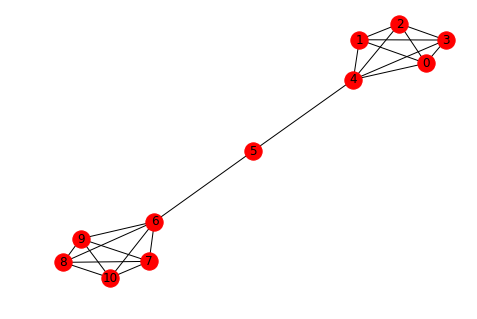

In [67]:
# Example 
# High betweenness centrality, low degree centrality?

import networkx as nx
import matplotlib.pyplot as plt

# generate a bar-bell-graph
G = nx.barbell_graph(m1=5, m2=1)

# To see the betweenness-centrality
print('Betweenness Centrality:', nx.betweenness_centrality(G))

# draw the graph
nx.draw(G, with_labels=True)

# show the graph
plt.show()

NetworkX betweenness centrality on a social network
Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

NetworkX provides the nx.betweenness_centrality(G) function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

In [ ]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

Deep dive - Twitter network
You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

NetworkX has been pre-imported for you as nx.

In [ ]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

Deep dive - Twitter network part II
Next, you're going to do an analogous deep dive on betweenness centrality! Just a few hints to help you along: remember that betweenness centrality is computed using nx.betweenness_centrality(G).

In [ ]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)
print(top_bc)
# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())